Pour ce TP, nous allons utiliser les données déjà traitées [ici](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data) Pour tester les différentes méthodes d'ensemble.

### **Bagging**
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [BaggingClassifier ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
- [BaggingRegressor ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

### **Boosting**
- [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [Gradient Boosting ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
- [CatBoost](https://catboost.ai/)

### **Stacking**
- [StackingClassifier ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)
- [StackingRegressor ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)
- [VotingClassifier ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
- [VotingRegressor ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)



 **Bonnes pratiques**

   - Vérifier les valeures manquantes
    
   - Utiliser [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
  pour optimiser les hyperparamètres
   - Utiliser la validation croisée
   - Tracer la courbe d'apprentissage
   - Calculer les métriques

In [3]:
import pandas as pd

df = pd.read_csv("train.csv")

print("Description du DF : ")
print(df.describe())
print("Aperçu du DF : ")
print(df.head())
print("Structure du DF : ")
print(df.shape)

Description du DF : 
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000 

# Bagging

In [9]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
print("Valeurs manquantes totales par colonne :")
print(df.isnull().sum().sum())  # Nombre total de valeurs manquantes

Valeurs manquantes par colonne :
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
Valeurs manquantes totales par colonne :
0


## 1. Random Forest

In [18]:
# Séparation des variables explicatives (X) et de la cible (y)
X = df.drop(["Activity", "subject"], axis=1)
y = df["Activity"]

# Encodage des classes cibles
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Convertit les activités en entiers

In [19]:
from sklearn.model_selection import train_test_split

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}, {y_test.shape}")

Taille de l'ensemble d'entraînement : (5881, 561), (5881,)
Taille de l'ensemble de test : (1471, 561), (1471,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Modèle Random Forest
rf = RandomForestClassifier(random_state=42)

# Paramètres pour GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

# GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour Random Forest :", grid_search_rf.best_params_)

Meilleurs paramètres pour Random Forest : {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)


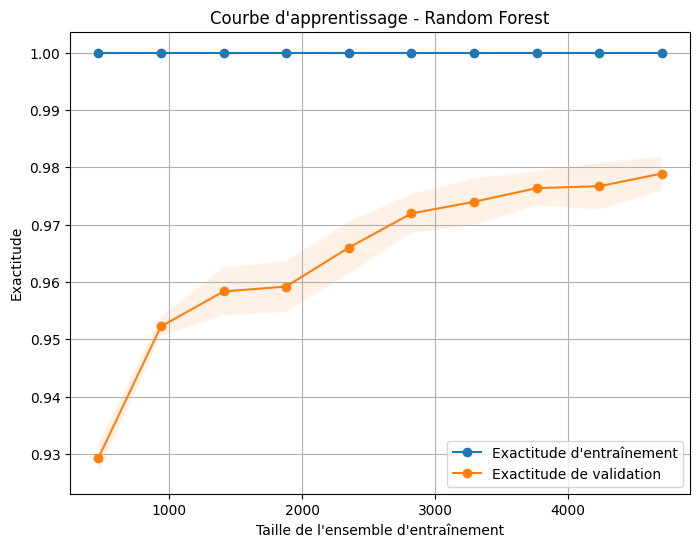

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_rf = grid_search_rf.best_estimator_
print(best_rf)

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - Random Forest")
plt.legend()
plt.grid()
plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_rf = best_rf.predict(X_test)

# Rapport de classification
print("Rapport de classification pour Random Forest :")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour Random Forest :")
print(confusion_matrix(y_test, y_pred_rf))

Rapport de classification pour Random Forest :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.95      0.95       262
          STANDING       0.96      0.95      0.95       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       1.00      0.97      0.98       206
  WALKING_UPSTAIRS       0.96      0.99      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471

Matrice de confusion pour Random Forest :
[[280   0   0   0   0   0]
 [  0 250  12   0   0   0]
 [  0  13 263   0   0   0]
 [  0   0   0 244   0   3]
 [  0   0   0   1 200   5]
 [  0   0   0   0   1 199]]


## 2. BaggingClassifier

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Modèle BaggingClassifier avec un arbre de décision comme base
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

# GridSearchCV pour BaggingClassifier
param_grid_bagging = {
    "n_estimators": [10, 50, 100],
    "estimator__max_depth": [10, 20, None]
}

grid_search_bagging = GridSearchCV(bagging, param_grid_bagging, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_bagging.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour BaggingClassifier :", grid_search_bagging.best_params_)

Meilleurs paramètres pour BaggingClassifier : {'estimator__max_depth': 20, 'n_estimators': 100}


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   random_state=42),
                  n_estimators=100, random_state=42)


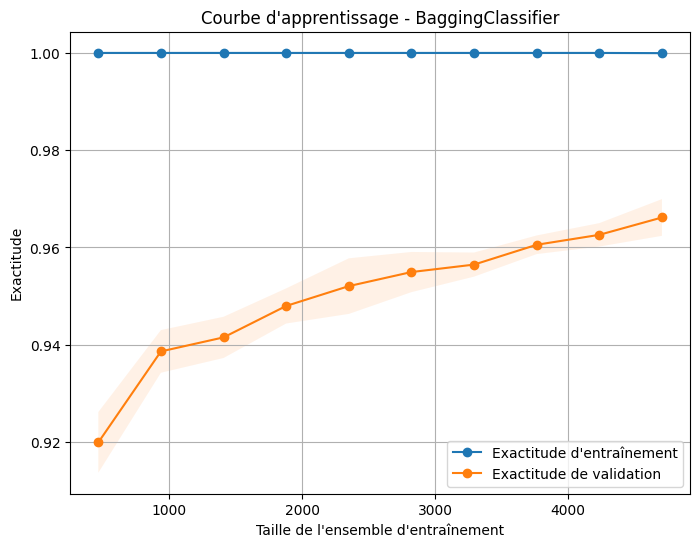

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_bc = grid_search_bagging.best_estimator_
print(best_bc)

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_bc, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - BaggingClassifier")
plt.legend()
plt.grid()
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_bc = best_bc.predict(X_test)

# Rapport de classification
print("Rapport de classification pour BaggingClassifier :")
print(classification_report(y_test, y_pred_bc, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour BaggingClassifier :")
print(confusion_matrix(y_test, y_pred_bc))

Rapport de classification pour BaggingClassifier :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.97      0.95      0.96       262
          STANDING       0.96      0.97      0.96       276
           WALKING       0.98      0.98      0.98       247
WALKING_DOWNSTAIRS       0.97      0.94      0.96       206
  WALKING_UPSTAIRS       0.94      0.97      0.95       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471

Matrice de confusion pour BaggingClassifier :
[[280   0   0   0   0   0]
 [  0 250  12   0   0   0]
 [  0   9 267   0   0   0]
 [  0   0   0 241   2   4]
 [  0   0   0   3 194   9]
 [  0   0   0   2   4 194]]


## 3. BaggingRegression

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Modèle BaggingRegressor avec une régression linéaire comme base
bagging_regressor = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=50,
    random_state=42
)

# GridSearchCV pour BaggingRegressor
param_grid_regressor = {
    "n_estimators": [10, 50, 100]
}

grid_search_regressor = GridSearchCV(bagging_regressor, param_grid_regressor, cv=5, scoring="r2", n_jobs=-1)
grid_search_regressor.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour BaggingRegressor :", grid_search_regressor.best_params_)

Meilleurs paramètres pour BaggingRegressor : {'n_estimators': 100}


BaggingRegressor(estimator=LinearRegression(), n_estimators=100,
                 random_state=42)


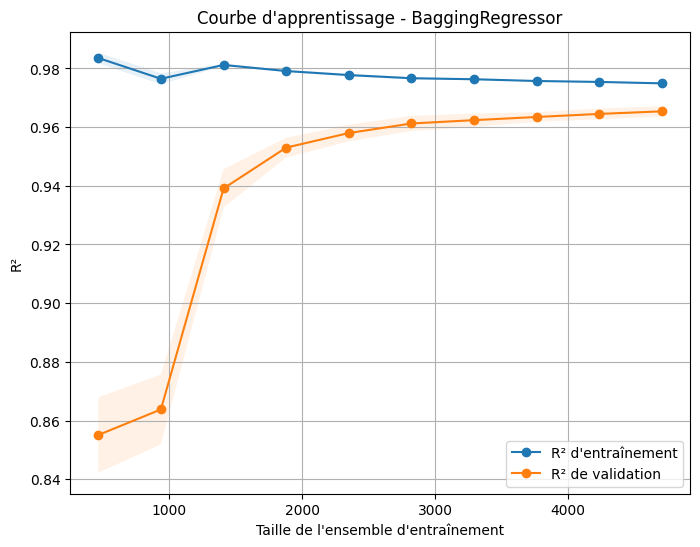

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_br = grid_search_regressor.best_estimator_
print(best_br)

# Courbe d'apprentissage avec une métrique adaptée à la régression
train_sizes, train_scores, test_scores = learning_curve(
    best_br, X_train, y_train, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="R² d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="R² de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("R²")
plt.title("Courbe d'apprentissage - BaggingRegressor")
plt.legend()
plt.grid()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

# Prédictions sur l'ensemble de test
y_pred_br = best_br.predict(X_test)

mse = mean_squared_error(y_test, y_pred_br)
print("Erreur quadratique moyenne (MSE) :", mse)

mae = mean_absolute_error(y_test, y_pred_br)
print("Erreur absolue moyenne (MAE) :", mae)

r2 = r2_score(y_test, y_pred_br)
print("Coefficient de détermination (R^2) :", r2)

rmse = np.sqrt(mse)
print("Erreur quadratique moyenne racine (RMSE) :", rmse)

Erreur quadratique moyenne (MSE) : 0.09261849711586055
Erreur absolue moyenne (MAE) : 0.23387430324192546
Coefficient de détermination (R^2) : 0.9669570830846168
Erreur quadratique moyenne racine (RMSE) : 0.30433287222359096


# Boosting

## 1. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Modèle AdaBoost
adaboost = AdaBoostClassifier(random_state=42)

# Paramètres pour GridSearchCV
param_grid_adaboost = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1, 10]
}

# GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour AdaBoost :", grid_search_adaboost.best_params_)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_adaboost = grid_search_adaboost.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_adaboost, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - AdaBoost")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_adaboost = best_adaboost.predict(X_test)

# Rapport de classification
print("Rapport de classification pour AdaBoost :")
print(classification_report(y_test, y_pred_adaboost, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour AdaBoost :")
print(confusion_matrix(y_test, y_pred_adaboost))

## 2. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Paramètres pour GridSearchCV
param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

# GridSearchCV
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour Gradient Boosting :", grid_search_gb.best_params_)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_gb = grid_search_gb.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - Gradient Boosting")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_gb = best_gb.predict(X_test)

# Rapport de classification
print("Rapport de classification pour Gradient Boosting :")
print(classification_report(y_test, y_pred_gb, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour Gradient Boosting :")
print(confusion_matrix(y_test, y_pred_gb))

## 3. XGBoost

In [ ]:
from xgboost import XGBClassifier

# Modèle XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Paramètres pour GridSearchCV
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour XGBoost :", grid_search_xgb.best_params_)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Meilleur modèle après optimisation
best_xgb = grid_search_xgb.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - XGBoost")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_xgb = best_xgb.predict(X_test)

# Rapport de classification
print("Rapport de classification pour XGBoost :")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour XGBoost :")
print(confusion_matrix(y_test, y_pred_xgb))

## 4. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# Modèle LightGBM
lgbm = LGBMClassifier(random_state=42)

# Paramètres pour GridSearchCV
param_grid_lgbm = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "num_leaves": [31, 50, 100]
}

# GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour LightGBM :", grid_search_lgbm.best_params_)

In [ ]:
from lightgbm import LGBMClassifier

# Meilleur modèle après optimisation
best_lgbm = grid_search_lgbm.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_lgbm, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - LightGBM")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Prédictions sur l'ensemble de test
y_pred_lgbm = best_lgbm.predict(X_test)

# Rapport de classification
print("Rapport de classification pour LightGBM :")
print(classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour LightGBM :")
print(confusion_matrix(y_test, y_pred_lgbm))

## 5. CatBoost

In [ ]:
from catboost import CatBoostClassifier

# Modèle CatBoost
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Paramètres pour GridSearchCV
param_grid_cb = {
    "iterations": [100, 200, 500],
    "learning_rate": [0.01, 0.1, 1],
    "depth": [3, 5, 7]
}

# GridSearchCV
grid_search_cb = GridSearchCV(catboost, param_grid_cb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_cb.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour CatBoost :", grid_search_cb.best_params_)

In [ ]:
from catboost import CatBoostClassifier

# Meilleur modèle après optimisation
best_cb = grid_search_cb.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_cb, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - CatBoost")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Prédictions sur l'ensemble de test
y_pred_cb = best_cb.predict(X_test)

# Rapport de classification
print("Rapport de classification pour CatBoost :")
print(classification_report(y_test, y_pred_cb, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour CatBoost :")
print(confusion_matrix(y_test, y_pred_cb))

# Stacking

## 1. StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Modèles de base pour le Stacking
estimators = [
    ("dt", DecisionTreeClassifier(random_state=42)),
    ("svc", SVC(probability=True, random_state=42))
]

# Modèle StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Paramètres pour GridSearchCV
param_grid_stacking_clf = {
    "final_estimator__C": [0.1, 1, 10],
    "final_estimator__penalty": ["l2"]
}

# GridSearchCV
grid_search_stacking_clf = GridSearchCV(stacking_clf, param_grid_stacking_clf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_stacking_clf.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour StackingClassifier :", grid_search_stacking_clf.best_params_)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_stacking_clf = grid_search_stacking_clf.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_stacking_clf, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - StackingClassifier")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_stacking_clf = best_stacking_clf.predict(X_test)

# Rapport de classification
print("Rapport de classification pour StackingClassifier :")
print(classification_report(y_test, y_pred_stacking_clf, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour StackingClassifier :")
print(confusion_matrix(y_test, y_pred_stacking_clf))

## 2. StackingRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Modèles de base pour le Stacking
estimators = [
    ("dt", DecisionTreeRegressor(random_state=42)),
    ("svr", SVR())
]

# Modèle StackingRegressor
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    n_jobs=-1
)

# Paramètres pour GridSearchCV
param_grid_stacking_reg = {
    "final_estimator__alpha": [0.1, 1, 10],
}

# GridSearchCV
grid_search_stacking_reg = GridSearchCV(stacking_reg, param_grid_stacking_reg, cv=5, scoring="r2", n_jobs=-1)
grid_search_stacking_reg.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour StackingRegressor :", grid_search_stacking_reg.best_params_)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_stacking_reg = grid_search_stacking_reg.best_estimator_

# Courbe d'apprentissage pour StackingRegressor
train_sizes, train_scores, test_scores = learning_curve(
    best_stacking_reg, X_train, y_train, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - StackingRegressor")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prédictions sur l'ensemble de test
y_pred_stacking_reg = best_stacking_reg.predict(X_test)

# Évaluation des métriques
print("R² :", r2_score(y_test, y_pred_stacking_reg))
print("MSE :", mean_squared_error(y_test, y_pred_stacking_reg))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_stacking_reg)))

## 3. VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Modèles pour VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("svc", SVC(probability=True, random_state=42)),
        ("lr", LogisticRegression(random_state=42))
    ],
    voting="soft",  # Prise en compte des probabilités
    n_jobs=-1
)

# Paramètres pour GridSearchCV
param_grid_voting_clf = {
    "svc__C": [0.1, 1, 10],  # Optimisation du SVM
    "dt__max_depth": [5, 10, 20],  # Optimisation de l'arbre de décision
    "lr__C": [0.1, 1, 10]  # Optimisation de la régression logistique
}

# GridSearchCV
grid_search_voting_clf = GridSearchCV(voting_clf, param_grid_voting_clf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_voting_clf.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour VotingClassifier :", grid_search_voting_clf.best_params_)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Meilleur modèle après optimisation
best_voting_clf = grid_search_voting_clf.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_voting_clf, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - VotingClassifier")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions sur l'ensemble de test
y_pred_voting_clf = best_voting_clf.predict(X_test)

# Rapport de classification
print("Rapport de classification pour VotingClassifier :")
print(classification_report(y_test, y_pred_voting_clf, target_names=le.classes_))

# Matrice de confusion
print("Matrice de confusion pour VotingClassifier :")
print(confusion_matrix(y_test, y_pred_voting_clf))

## 4. VotingRegressor

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Modèles pour VotingRegressor
voting_reg = VotingRegressor(
    estimators=[
        ("dt", DecisionTreeRegressor(random_state=42)),
        ("svr", SVR()),
        ("ridge", Ridge())
    ]
)

# Paramètres pour GridSearchCV
param_grid_voting_reg = {
    "dt__max_depth": [5, 10, 20],  # Optimisation de l'arbre de décision
    "svr__C": [0.1, 1, 10],  # Optimisation du SVM
    "ridge__alpha": [0.1, 1, 10]  # Optimisation de Ridge
}

# GridSearchCV
grid_search_voting_reg = GridSearchCV(voting_reg, param_grid_voting_reg, cv=5, scoring="r2", n_jobs=-1)
grid_search_voting_reg.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres pour VotingRegressor :", grid_search_voting_reg.best_params_)

In [ ]:
# Meilleur modèle après optimisation
best_voting_reg = grid_search_voting_reg.best_estimator_

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_voting_reg, X_train, y_train, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé de la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="R² d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="R² de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("R²")
plt.title("Courbe d'apprentissage - VotingRegressor")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prédictions sur l'ensemble de test
y_pred_voting_reg = best_voting_reg.predict(X_test)

# Évaluation des métriques
print("R² :", r2_score(y_test, y_pred_voting_reg))
print("MSE :", mean_squared_error(y_test, y_pred_voting_reg))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_voting_reg)))